In [194]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import requests
import seaborn as sns
import csv
import gmaps

In [195]:
# Read merged CSV file - election results and census data
csv_path = "merged_file2.csv"
merged_df = pd.read_csv(csv_path)

merged_df.head(3)

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed,White Male (Bachelors or higher) %,White Female (Bachelors or higher) %,Af-Am Male (25 and over) %,Af-Am Female (Bachelors or higher) %
0,0,Indiana,IN,Adams County,2802,9642,13039,21.49,73.95,34813,...,47572,21173,114600,15975,8948,872,16.54,14.83,0.00,3.33
1,1,Indiana,IN,Allen County,55222,83801,145787,37.88,57.48,365565,...,49574,26058,116400,186706,93216,13152,29.69,28.96,13.63,12.97
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,30.38,63.72,80203,...,55874,28631,137500,41710,21169,2165,27.68,25.60,41.75,19.78


In [196]:
merged_df.dtypes

Unnamed: 0                                int64
State                                    object
State Abbr                               object
County                                   object
DEM Votes                                 int64
GOP Votes                                 int64
Total Votes                               int64
DEM %                                   float64
GOP %                                   float64
Total Population                          int64
Population (White)                        int64
Population (African-American)             int64
Population (Asian)                        int64
Population (Hispanic)                     int64
Median Age                              float64
Median Age (Male)                       float64
Median Age (Female)                     float64
Education (None)                          int64
Education (High School)                   int64
Education (GED)                           int64
Education (Associates)                  

The r-squared value is: -0.5756050057898672
y = -0.51x + 58.58


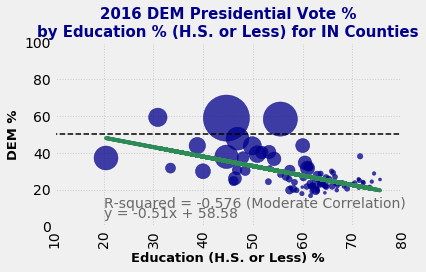

In [197]:
# Create scatterplot for Education (H.S. or Less) % vs. DEM %
plt.style.use('fivethirtyeight')
x_values = merged_df["Education (H.S. or Less) %"]
y_values = merged_df["DEM %"]
plt.title("2016 DEM Presidential Vote %\nby Education % (H.S. or Less) for IN Counties", fontsize=15, color="darkblue", weight="bold")
plt.ylabel("DEM %", fontsize=13, weight="bold")
plt.xlabel("Education (H.S. or Less) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="darkblue",
           edgecolors="darkblue",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(10, 80);
plt.ylim(0, 100);

# Display & save
#plt.plot(merged_df["Education (None)"],regress_values,"black")
plt.annotate(f"R-squared = {round(rvalue,3)} (Moderate Correlation)", (20,10), fontsize=14, color="dimgray")
plt.annotate(line_eq, (20,5), fontsize=14, color="dimgray")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_HS_or_Less_%_vs_Dem.png")
plt.show()

The r-squared value is: 0.5910193823689889
y = 0.54x + 35.15


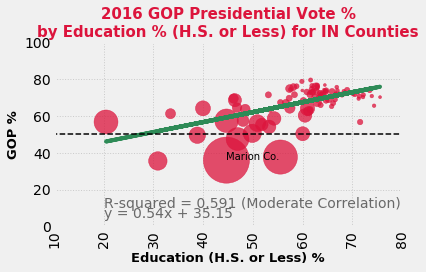

In [198]:
# Create scatterplot for Education (H.S. or Less) % vs. GOP %
plt.style.use('fivethirtyeight')
x_values = merged_df["Education (H.S. or Less) %"]
y_values = merged_df["GOP %"]
plt.title("2016 GOP Presidential Vote %\nby Education % (H.S. or Less) for IN Counties", fontsize=15, color="crimson", weight="bold")
plt.ylabel("GOP %", fontsize=13, weight="bold")
plt.xlabel("Education (H.S. or Less) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="crimson",
           edgecolors="crimson",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(10, 80);
plt.ylim(0, 100);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Moderate Correlation)", (20,10), fontsize=14, color="dimgray")
plt.annotate(line_eq, (20,5), fontsize=14, color="dimgray")

marion=merged_df.loc[(merged_df["County"]=="Marion County")]
marion.head()
x_marion=marion["Education (H.S. or Less) %"][48]
y_marion=marion["GOP %"][48]
plt.annotate('Marion Co.',(x_marion,y_marion), fontsize=10)

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_HS_or_Less_%_vs_GOP.png")
plt.show()

The r-squared value is: 0.5756050057898671
y = 0.51x + 7.11


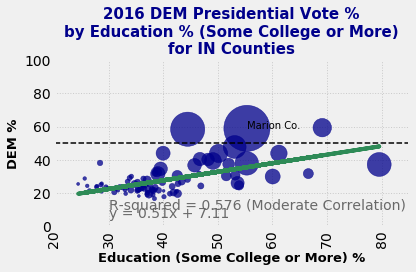

In [199]:
# Create scatterplot for Education (Some College or More) % vs. DEM %
plt.style.use('fivethirtyeight')
x_values = merged_df["Education (Some College or More) %"]
y_values = merged_df["DEM %"]
z_values = merged_df["DEM Votes"]
plt.title("2016 DEM Presidential Vote %\nby Education % (Some College or More)\nfor IN Counties", fontsize=15, color="darkblue", weight="bold")
plt.ylabel("DEM %", fontsize=13, weight="bold")
plt.xlabel("Education (Some College or More) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="darkblue",
           edgecolors="darkblue",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(20, 85);
plt.ylim(0, 100);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Moderate Correlation)", (30,10), fontsize=14, color="dimgray")
plt.annotate(line_eq, (30,5), fontsize=14, color="dimgray")

marion=merged_df.loc[(merged_df["County"]=="Marion County")]
marion.head()
x_marion=marion["Education (Some College or More) %"][48]
y_marion=marion["DEM %"][48]
plt.annotate('Marion Co.',(x_marion,y_marion), fontsize=10)

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_Some_College_or_More_%_vs_DEM.png")
plt.show()

The r-squared value is: -0.5910193823689889
y = -0.54x + 89.13


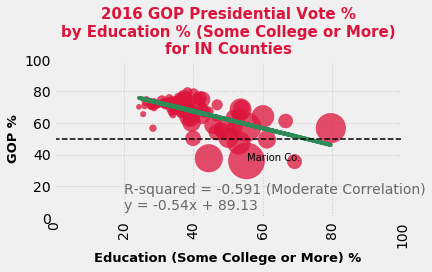

In [200]:
# Create scatterplot for Education (Some College or More) % vs. GOP %
plt.style.use('fivethirtyeight')
x_values = merged_df["Education (Some College or More) %"]
y_values = merged_df["GOP %"]
z_values = merged_df["GOP Votes"]
plt.title("2016 GOP Presidential Vote %\nby Education % (Some College or More)\nfor IN Counties", fontsize=15, color="crimson", weight="bold")
plt.ylabel("GOP %", fontsize=13, weight="bold")
plt.xlabel("Education (Some College or More) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="crimson",
           edgecolors="crimson",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(0, 100);
plt.ylim(0, 100);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Moderate Correlation)", (20,15), fontsize=14, color="dimgray")
plt.annotate(line_eq, (20,5), fontsize=14, color="dimgray")

marion=merged_df.loc[(merged_df["County"]=="Marion County")]
marion.head()
x_marion=marion["Education (Some College or More) %"][48]
y_marion=marion["GOP %"][48]
plt.annotate('Marion Co.',(x_marion,y_marion), fontsize=10)

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_Some_College_or_More_%_vs_GOP.png")
plt.show()

The r-squared value is: 0.5883667510674764
y = 0.61x + 16.55


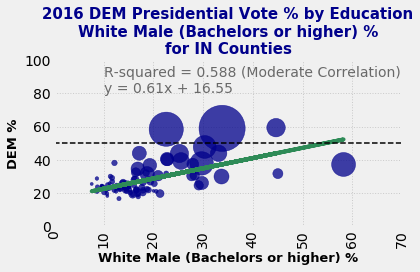

In [201]:
# Create scatterplot for Education - White Male (Bachelors or higher) % vs. DEM %
plt.style.use('fivethirtyeight')
x_values = merged_df["White Male (Bachelors or higher) %"]
y_values = merged_df["DEM %"]
z_values = merged_df["DEM Votes"]
plt.title("2016 DEM Presidential Vote % by Education\nWhite Male (Bachelors or higher) %\nfor IN Counties", fontsize=15, color="darkblue", weight="bold")
plt.ylabel("DEM %", fontsize=13, weight="bold")
plt.xlabel("White Male (Bachelors or higher) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="darkblue",
           edgecolors="darkblue",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(0, 70);
plt.ylim(0, 100);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Moderate Correlation)", (10,90), fontsize=14, color="dimgray")
plt.annotate(line_eq, (10,80), fontsize=14, color="dimgray")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_White_Male_Bachelors_or_higher_%vs_DEM.png")
plt.show()

The r-squared value is: -0.6078705862669113
y = -0.65x + 79.3


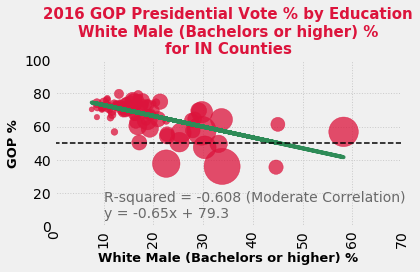

In [202]:
# Create scatterplot for Education - White Male (Bachelors or higher) % vs. GOP %
plt.style.use('fivethirtyeight')
x_values = merged_df["White Male (Bachelors or higher) %"]
y_values = merged_df["GOP %"]
z_values = merged_df["GOP Votes"]
plt.title("2016 GOP Presidential Vote % by Education\nWhite Male (Bachelors or higher) %\nfor IN Counties", fontsize=15, color="crimson", weight="bold")
plt.ylabel("GOP %", fontsize=13, weight="bold")
plt.xlabel("White Male (Bachelors or higher) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="crimson",
           edgecolors="crimson",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(0, 70);
plt.ylim(0, 100);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Moderate Correlation)", (10,15), fontsize=14, color="dimgray")
plt.annotate(line_eq, (10,5), fontsize=14, color="dimgray")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_White_Male_Bachelors_or_higher_%vs_GOP.png")
plt.show()

The r-squared value is: 0.040388085246675795
y = 0.01x + 27.37


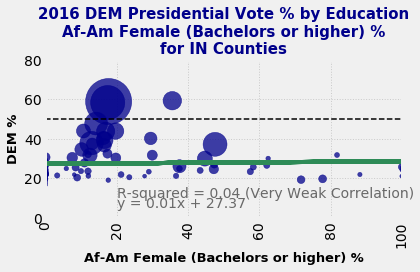

In [203]:
# Create scatterplot for Education - Af-Am Female (Bachelors or higher) % vs. DEM %
plt.style.use('fivethirtyeight')
x_values = merged_df["Af-Am Female (Bachelors or higher) %"]
y_values = merged_df["DEM %"]
z_values = merged_df["DEM Votes"]
plt.title("2016 DEM Presidential Vote % by Education\nAf-Am Female (Bachelors or higher) %\nfor IN Counties", fontsize=15, color="darkblue", weight="bold")
plt.ylabel("DEM %", fontsize=13, weight="bold")
plt.xlabel("Af-Am Female (Bachelors or higher) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="darkblue",
           edgecolors="darkblue",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(0, 100);
plt.ylim(0, 80);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Very Weak Correlation)", (20,10), fontsize=14, color="dimgray")
plt.annotate(line_eq, (20,5), fontsize=14, color="dimgray")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_Af-Am_Female_Bachelors_or_higher_%vs_DEM.png")
plt.show()

The correlation between both factors is -0.05
The r-squared value is: -0.05275253039016259
y = -0.02x + 67.96


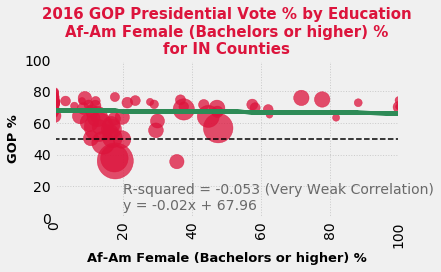

In [204]:
# Create scatterplot for Education - Af-Am Female (Bachelors or higher) % vs. GOP %
plt.style.use('fivethirtyeight')
x_values = merged_df["Af-Am Female (Bachelors or higher) %"]
y_values = merged_df["GOP %"]
z_values = merged_df["GOP Votes"]
plt.title("2016 GOP Presidential Vote % by Education\nAf-Am Female (Bachelors or higher) %\nfor IN Counties", fontsize=15, color="crimson", weight="bold")
plt.ylabel("GOP %", fontsize=13, weight="bold")
plt.xlabel("Af-Am Female (Bachelors or higher) %", fontsize=13, weight="bold")

# Calculate & plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format plot
plt.scatter(x_values,y_values,
            marker="o",
            facecolors="crimson",
           edgecolors="crimson",
            s=z_values*0.01,
            alpha=0.75)
plt.plot(x_values,regress_values,"seagreen")
plt.xticks(rotation='vertical')
plt.grid(linestyle="dotted")

# Set x-axis & y-axis limits
plt.xlim(0, 100);
plt.ylim(0, 100);

# Display & save
plt.annotate(f"R-squared = {round(rvalue,3)} (Very Weak Correlation)", (20,15), fontsize=14, color="dimgray")
plt.annotate(line_eq, (20,5), fontsize=14, color="dimgray")

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared value is: {rvalue}")
print(line_eq)

plt.plot([0, 100], [50, 50], '--', lw=1.5, color="black")

plt.tight_layout()
plt.savefig("Scatter_Education_Af-Am_Female_Bachelors_or_higher_%vs_GOP.png")
plt.show()